Project 2 - Simulations
=================

Welcome to the second project in DSC 10! We will be exploring more on simulations, randomness, sampling, functions, and experiments in this project. In this project, you will need to solve two problems: one called the ***[100 Prisoners Problem](https://en.wikipedia.org/wiki/100_prisoners_problem)*** and another problem about coin flips.

As usual, **run the cell below** to prepare the automatic tests. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

#### DO NOT change the variable names! 
This may cause the automatic grading scripts not to recognize your answers.

#### Here are some functions and programming concepts that you might find useful for this project:

`Tables.apply`  **(*[See Textbook](https://www.inferentialthinking.com/chapters/07/1/applying-a-function-to-a-column.html)*)**

`np.random.choice`  **(*[See Textbook](https://ucsd-dsc10.gitbooks.io/textbook/content/chapters/08/randomness.html)*)**

`in` operator **(*[See Link](http://kracekumar.com/post/22512660850/python-in-operator-use-cases)*)**

`while` loops **(*[See Link](https://www.cs.utah.edu/~germain/PPS/Topics/while_loops.html)*)** **(*[See Another Link](https://www.programiz.com/python-programming/while-loop)*)**


In [28]:
t = Table().with_columns('pos', [1,2,3,4,5], 'count', [3,52,21,452,543])

In [30]:
t.group('count')

count
3
21
52
452
543


In [2]:
# Run this cell, but please don't change it.

import numpy as np
import math
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# These lines load the tests.
#from client.api.assignment import load_assignment 
##from client.api.notebook import Notebook
#project2 = Notebook('project2.ok')
#_ = project2.auth(inline=True)

Part 0: The 100 Prisoners Problem
======

There are many statements of this problem, but let us use the one by Philippe Flajolet and Robert Sedgewick:

**"*The director of a prison offers 100 death row prisoners, who are numbered from 1 to 100, a last chance. A room contains a cupboard with 100 drawers. The director randomly puts one prisoner's number in each closed drawer. The prisoners enter the room, one after another. Each prisoner may open and look into 50 drawers in any order. The drawers are closed again afterwards. If, during this search, every prisoner finds his number in one of the drawers, all prisoners are pardoned. If just one prisoner does not find his number, all prisoners die. Before the first prisoner enters the room, the prisoners may discuss strategy—but may not communicate once the first prisoner enters to look in the drawers. What is the prisoners' best strategy?*"**

Source: Philippe Flajolet, Robert Sedgewick (2009), Analytic Combinatorics, Cambridge University Press, p. 124.

Consider a more general game where there are `p` prisoners, numbered by integers `[0, p-1]`, and each prisoner can open `d` drawers. 

**Question 0.0** If the first prisoner opens `d` drawers at random, write an expression in terms of `p` and `d` for the probability that this prisoner finds his/her number. 

d/p

**Question 0.1** If all of the prisoners open `d` drawers at random, write an expression in terms of `p` and `d` for the probability that all of the prisoners find their numbers. 

(d/p)^p

Part 1: Simulation of Random Strategy
=======

First, let's see through simulation what will happen if each of 10 prisoners randomly selects 5 drawers to open.


**Question 1.0** In order to simulate this game, we need to be able to model the process of opening 5 random drawers and obtaining 5 random numbers from the 10 prisoners' numbers, 0 through 9. Moreover, we want to be able to do this multiple times, and possibly for a different number of prisoners `p`and a different number of drawers `d`.  

As a result, we need to define a function `open_random_drawers` that takes an argument `p`, which is the number of prisoners, and an argument `d`, which is the number of drawers each prisoner will open, and returns a list of `d` **distinct** integers randomly selected from `[0, p-1]`.

For example, a call to `open_random_drawers(10, 5)` might return `[3,7,0,4,2]`, or `[1,8,9,4,0]`, etc

In [3]:
def open_random_drawers(p, d):
    return np.random.choice(np.arange(int(p)), int(d), replace=False ) 

open_random_drawers(10, 5)

array([7, 2, 0, 4, 3])

In [3]:
_ = project2.grade('q10')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.1** Then, to simulate a game where `p=10` and `d=5`, create a table that holds the prisoners as well as the numbers of the five random drawers they open. Specifically, we want a `prisoner` column that contains the prisoner numbers (from 0 to 9), and a `choices` column with entries of type `list`. These lists should contain the five numbers inside the drawers each prisoner opens.

In [4]:
prisoner_choices = []

for i in np.arange(10):
    prisoner_choices.append(open_random_drawers(10,5))

prisoner_table = Table().with_columns('prisoner', 
                                     np.arange(10), 
                                     'choices', 
                                     prisoner_choices)

prisoner_table

prisoner,choices
0,[2 4 9 5 6]
1,[5 1 6 8 9]
2,[4 5 9 7 3]
3,[7 6 4 5 3]
4,[1 9 5 0 3]
5,[0 6 3 5 2]
6,[0 3 4 6 7]
7,[0 2 9 6 7]
8,[7 5 6 4 9]
9,[5 6 7 0 2]


In [5]:
_ = project2.grade('q11')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.2** After generating the choices, append to the original table a `found` column that stores `True` if the prisoner found his/her number or `False` if not. The type of elements in the `found` column should be `bool`, not `str`. Also, calculate the number of prisoners who succeeded in finding their number, which we will call the number of successes.
*Hint: Use `apply` and `in`.*

In [5]:
def is_inside(x, y):
    return x in y

prisoner_table = prisoner_table.with_column('found', prisoner_table.apply(is_inside, 'prisoner', 'choices'))

num_successes = np.count_nonzero(prisoner_table.column('found'))

print('Simulation result: ' + str(num_successes) + ' prisoners found.')
prisoner_table



Simulation result: 5 prisoners found.


prisoner,choices,found
0,[2 4 9 5 6],False
1,[5 1 6 8 9],True
2,[4 5 9 7 3],False
3,[7 6 4 5 3],True
4,[1 9 5 0 3],False
5,[0 6 3 5 2],True
6,[0 3 4 6 7],True
7,[0 2 9 6 7],True
8,[7 5 6 4 9],False
9,[5 6 7 0 2],False


In [41]:
_ = project2.grade('q12')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.3** Now that you have simulated one game, you want to simulate multiple games to create an empirical distribution of the number of successes. Based on your previous code, write a function called `simulate_game` that takes two inputs:

*1. number of prisoners, `p`*

*2. number of drawers each prisoner will open at random, `d`*

and returns the number of prisoners who succeeded in finding their number according the strategy of random drawer opening.

In [9]:
def simulate_game(p, d):
    prisoner_choices= []
    for i in np.arange(p):
        prisoner_choices.append(open_random_drawers(p,d))
    prisoner_table = Table().with_columns('prisoner', 
                                     np.arange(p), 
                                     'choices', 
                                     prisoner_choices)

    prisoner_table = prisoner_table.with_column('found', prisoner_table.apply(is_inside, 'prisoner', 'choices'))
    num_successes = np.count_nonzero(prisoner_table.column('found'))
    return num_successes

simulation_result = simulate_game(10, 5)
print('Simulation result: ' + str(simulation_result) + ' prisoners found.')

Simulation result: 6 prisoners found.


In [10]:
_ = project2.grade('q13')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.4** Now, you will simulate 10,000 games with 10 players each opening 5 drawers at random. Record in a table the number of prisoners who found their numbers in each simulated game. Use this table to draw a histogram showing the empirical distribution of the number of prisoners who find their numbers. Make sure each possible value falls in its own bin. 

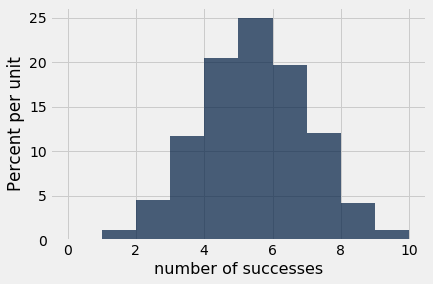

In [11]:
results_array = make_array()
trials = 10000
for i in range(trials):
    results_array = np.append(results_array, simulate_game(10,5))

results_table = Table().with_columns('game', 
                                     np.arange(trials), 
                                     'number of successes', 
                                     results_array)
results_table.hist('number of successes', bins=np.arange(0, 11, 1))

**Question 1.5** Use the table you created in question 1.4 to estimate the probability that the 10 prisoners will avoid death row using this strategy.

In [13]:
estimated_prob = results_table.where('number of successes', 10).num_rows/trials
estimated_prob

0.0011

**Question 1.6** Now run the same simulation for 100,000 games. It may take a few minutes to simulate such a large number of games. Estimate the probability that the 10 prisoners will avoid death row using this strategy.

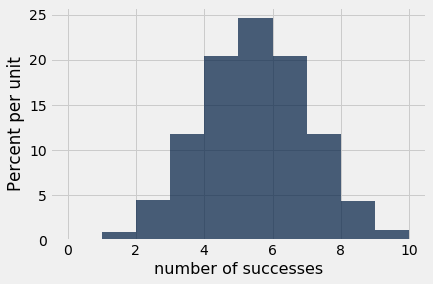

In [38]:
results_array = make_array()
trials = 100000
for i in range(trials):
    results_array = np.append(results_array, simulate_game(10,5))

results_table = Table().with_columns('game', 
                                     np.arange(trials), 
                                     'number of successes', 
                                     results_array)
results_table.hist('number of successes', bins=np.arange(0, 11, 1))

In [39]:
estimated_prob_again = results_table.where('number of successes', 10).num_rows/trials
estimated_prob_again

0.00108

Part 2: Simulation of Optimal Strategy
=======

The strategy of opening doors at random has shown itself to be a poor strategy. Consider the following better strategy, which is in fact the optimal strategy.

Suppose the drawers are also numbered with the integers `[0, p-1]`. The strategy for each prisoner is to:

1. **Open the drawer with his own number.**
2. **Next, open the drawer whose number matches the contents of the drawer just opened.**
3. **Repeat the previous step until no more drawers may be opened, or until he finds his own number.**

For example, taking the case of 10 prisoners who can each open five drawers, suppose the contents of the numbered drawers are:

Drawer 0: 7  
Drawer 1: 0  
Drawer 2: 1  
Drawer 3: 4  
Drawer 4: 2  
Drawer 5: 3  
Drawer 6: 8  
Drawer 7: 9  
Drawer 8: 6  
Drawer 9: 2  

Prisoner 0 will start by opening Drawer 0, then Drawer 7, then Drawer 9, then Drawer 2, and finally Drawer 1. At this point, he will stop because he has opened the maximum number of drawers, five, and also because he got lucky enough to find his own number!

**Question 2.0** Suppose for now that the numbers are assigned to drawers as in the example above, which we will represent with an array `drawer_assignment = make_array(7, 0, 1, 4, 2, 3, 8, 9, 6, 2)`. 

Write a function `open_drawers(p, d, drawers, n)` to model the process of opening drawers according to the optimal strategy. This function will take arguments `p`, the number of prisoners, `d`, the number of drawers each prisoner will open, and `n` a prisoner number in the range `[0, p-1]`. It should return a list of d integers in `[0, p-1]` representing the numbers that prisoner `n` will see inside the drawers when opening the **maximum number** of drawers `d` using the strategy that the next drawer to open comes from the contents of the drawer previously opened. For example, if the numbers are arranged in drawers as in the example above, here are some sample calls to this function.  
`open_drawers(10, 5, drawer_assignment, 0) = [7, 9, 2, 1, 0]`  
`open_drawers(10, 5, drawer_assignment, 8) = [6, 8, 6, 8, 6]`

In [15]:
drawer_assignment = make_array(7, 0, 1, 4, 5, 3, 8, 9, 6, 2)

def open_drawers(p, d,drawers, n):
    array_of_numbers = make_array()
    current_drawer = n
    current_contents = drawers.item(current_drawer)
    for i in np.arange(d):
        array_of_numbers = np.append(array_of_numbers, current_contents)
        current_drawer = current_contents
        current_contents = drawers.item(current_drawer)
    return array_of_numbers


open_drawers(10,5, drawer_assignment, 8)

array([ 6.,  8.,  6.,  8.,  6.])

In [21]:
_ = project2.grade('q20')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.1** As you did for `simulate_game` in Question 1.3, now implement a similar  `simulate_game_optimal` that simulates one game using this new optimal strategy. Your function  `simulate_game_optimal` should take two inputs:

*1. number of prisoners, `p`*

*2. number of drawers each prisoner will open at random, `d`*

and return the number of prisoners who succeeded in finding their number according to the optimal strategy. Your game should use a **random** assignment of numbers to drawers.

In [22]:
def simulate_game_optimal(p, d):
    assign_drawers = np.random.choice(np.arange(p), p, replace=False)
    temp = []
    for i in np.arange(p):
        temp.append(open_drawers(p,d, assign_drawers, i))
    prisoner_table = Table().with_columns('prisoner', 
                                     np.arange(p), 
                                     'choices', 
                                     temp)

    prisoner_table = prisoner_table.with_column('found', prisoner_table.apply(is_inside, 'prisoner', 'choices'))
    #print(prisoner_table)
    num_successes = np.count_nonzero(prisoner_table.column('found'))
    return num_successes

simulation_result = simulate_game_optimal(10, 5)
print('Simulation result: ' + str(simulation_result) + ' prisoners found.')

Simulation result: 4 prisoners found.


In [23]:
_ = project2.grade('q21')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.2** Simulate 100,000 games with 10 players each opening 5 drawers according to the optimal strategy. As in Question 1.4, draw a histogram showing the empirical distribution of the number of prisoners who find their numbers. Make sure each possible value falls in its own bin. It may take a few minutes to simulate such a large number of games.

Describe the differences between the empirical distributions of the two different strategies (random and optimal). In particular, explain why the bar of the histogram corresponding to seven people finding their numbers is of height zero in the optimal strategy but not in the random strategy.

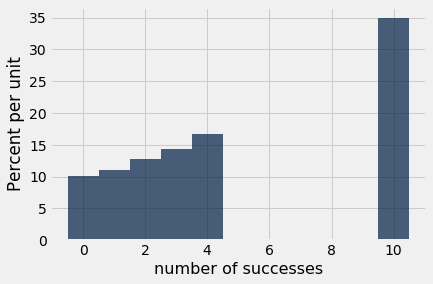

In [15]:
results_array = make_array()
trials = 100000
for i in range(trials):
    results_array = np.append(results_array, simulate_game_optimal(10,5))

results_table = Table().with_columns('game', 
                                     np.arange(trials), 
                                     'number of successes', 
                                     results_array)
results_table.hist('number of successes', bins=np.arange(-0.5, 11, 1))

The random strategy's histogram is symmetric with most of the area in the middle, meaning it's most likely to get somewhere around 5 successes, and it is very unlikely to get 0 or 10 successes. This is quite different from the optimal strategy, in which the number of successes is either small (0 through 4) or very high (10). In the simulation of the optimal strategy, there were no instances where the number of successes was 5 through 9. 

Consider, for example, the situation where 7 prisoners find their numbers. Our empirical results show this never happened within 100,000 trials, and in fact, we can show it is impossible for exactly 7 prisoners to find their numbers. To show this, first consider a diagram made up of the numbers 1 through 10, where we draw an arrow from X to Y if the drawer labeled X contains the number Y. This diagram will just be a bunch of loops. For example, if drawer 6 contains 8 and drawer 8 contains 6, this would be depicted with an arrow from 6 to 8 and and arrow from 8 back to 6. We’ll call this a loop of size 2.

For a prisoner to find their number when they are allowed to open 5 drawers, it means that their number has to be within a loop of size 5 or less (a “small loop”).  So in the situation where exactly 7 prisoners find their numbers, this means exactly 7 of the prisoners have their numbers in a small loop. But then the remaining 3 prisoners must also have their numbers in small loops, so they will also be able to find their numbers, and then all 10 prisoners will find their numbers. This argument shows that if 7 people find their numbers, then actually all 10 must find their numbers. This explains why the histogram has no area corresponding to 5, 6, 7, 8, or 9, and why the bar for 10 is so tall. This gives a good idea of why this strategy works so well.


**Question 2.3** Use the results of your simulation to estimate the probability that the 10 prisoners will avoid death row using this strategy.

In [16]:
estimated_prob_opt = results_table.where('number of successes', 10).num_rows/trials
estimated_prob_opt

0.34924

**Question 2.4** Apply the same methods as above to compare the two strategies (random and optimal) in the case of the original problem with 100 prisoners each opening 50 drawers. For each strategy, compare the effectiveness of the p=10, d=5 case with  the p=100, d=50 case to see how the size of the problem influences the effectiveness of each strategy.

0.0

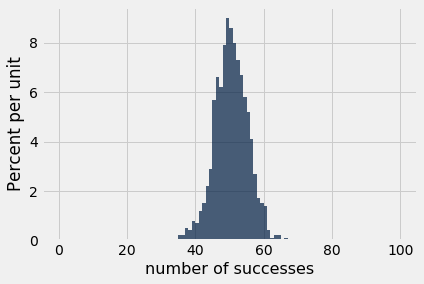

In [17]:
#random strategy with 1,000 games

results_array = make_array()
trials = 1000
for i in range(trials):
    results_array = np.append(results_array, simulate_game(100,50))

results_table = Table().with_columns('game', 
                                     np.arange(trials), 
                                     'number of successes', 
                                     results_array)
results_table.hist('number of successes', bins=np.arange(0, 101, 1))

estimated_prob_again = results_table.where('number of successes', 100).num_rows/trials
estimated_prob_again

0.307

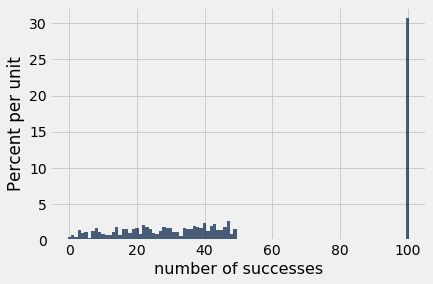

In [27]:
#optimal strategy with 1,000 games

results_array = make_array()
trials = 1000
for i in range(trials):
    results_array = np.append(results_array, simulate_game_optimal(100,50))

results_table = Table().with_columns('game', 
                                     np.arange(trials), 
                                     'number of successes', 
                                     results_array)
results_table.hist('number of successes', bins=np.arange(-0.5, 101, 1))

estimated_prob_opt = results_table.where('number of successes', 100).num_rows/trials
estimated_prob_opt

With 100 prisoners, we observe again that the optimal strategy is much better than the random strategy. The change in the number of prisoners has a huge effect on the random strategy, and a minor effect on the optimal strategy. For the random strategy, we see that the p=100, d=50 case is highly unlikely to ever work, whereas it does work occasionally in the p=10, d=5 case. We can explain this using the probability of the random strategy working, which we calculated in question 0.1 as (d/p)^d. In the p=100, d=50 case, this probability is 1/2^(50), whereas in the p=10, d=5 case, this probability is 1/2^5, which is much greater. With the optimal strategy, there is not as drastic a difference between the p=100, d=50 and the p=10, d=5 case, though the probability of success is about 4% lower in the p=100, d=50 case (0.349 to 0.307).

Part 3: HHT or HTT?
=======

Suppose we have a fair coin, where the probabilty of heads (H) is 0.5 and the probability of tails (T) is 0.5. We know from probability that if we flip the coin three times, any of the eight possible coin toss sequences is equally likely to appear. This problem concerns, rather than three coin flips, the situation where we flip coins until a certain coin toss sequence appears.

"***Flip a coin until either HHT or HTT appears. Is one more  likely to appear first? If so, which one and with what probability?***"

Simulate this problem to estimate the probability that HHT appears first and the probability that HTT appears first. 

**Question 3.0** In order to do the simulation, we need to generate coin flips. Write a function called `generate_flips` that keep generating flips until either `HTT` or `HHT` appears. This function should return `HTT` or `HHT`, whichever appears first.


In [17]:
coin = make_array("H", "T")

def generate_flips():
    done = False
    num_flips = 0
    results = make_array()
    while done==False:
        results = np.append(results, np.random.choice(coin, 1))
        num_flips = num_flips + 1
        if num_flips >=3 and results.item(num_flips-1)=="T" and results.item(num_flips-3)=="H":
            done = True
    if results.item(num_flips-2)=="T":
        return "HTT"
    else: 
        return "HHT"

generate_flips()

'HHT'

In [18]:
_ = project2.grade('q30')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.1** Now that we can generate coin flip sequences until getting `HHT` or `HTT`, we want to generate such coin flip sequences many times. Simulate 10,000 coin toss sequences until one of `HHT` or `HTT` occurs, and record which pattern occured first in a table called `coin_flips` that contains a single column called `pattern`. Each entry in the `pattern` column should be either `HHT` or `HTT`, whichever appeared first.

In [19]:
simulation_results = make_array()

for i in np.arange(10000):
    simulation_results = np.append(simulation_results, generate_flips())
    
coin_flips = Table().with_column("pattern", simulation_results)

coin_flips

pattern
HHT
HHT
HHT
HHT
HHT
HTT
HTT
HHT
HHT
HHT


In [20]:
_ = project2.grade('q31')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.2** After generating all the flips, we want to calculate the empirical probability that `HHT` appears first. Store this value in a variable called `HHT_emp_prob`.

In [21]:
HHT_emp_prob = coin_flips.where("pattern", "HHT").num_rows/coin_flips.num_rows

HHT_emp_prob

0.6642

To calculate the actual probability of HHT appearing first, and to check if your empirical probability was close, you can ***[learn more here.](https://dicedcoins.wordpress.com/2012/07/19/flip-hhh-before-htt/)***

**Congratulations!** You are done with Project 2 of DSC 10.

#### Please make sure that you have run all the cells in the notebook (Cell -> Run All) and that you have written down answers to the free response questions before submitting your project using the code cell below. 

By running the code cell below, you affirm that this project is the original work of you and your partner (if any), in accordance with the academic integrity agreement for this class and the University. 

Please be sure to **add your partner on OK**! Detailed instructions are on Piazza (@237).

In [ ]:
_ = project2.submit()